# Data Science Salary Analysis and Prediction

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

## 2. Load and Explore Data

In [3]:
df = pd.read_csv('salaries.csv')
print("Dataset shape:", df.shape)
print("First 5 rows:")
display(df.head())
print("Data types and missing values:")
df.info()
print("Summary statistics:")
display(df.describe(include='all'))

Dataset shape: (151445, 11)
First 5 rows:


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EX,FT,Head of Data,348516,USD,348516,US,0,US,M
1,2025,EX,FT,Head of Data,232344,USD,232344,US,0,US,M
2,2025,SE,FT,Data Scientist,145400,USD,145400,US,0,US,M
3,2025,SE,FT,Data Scientist,81600,USD,81600,US,0,US,M
4,2025,MI,FT,Engineer,160000,USD,160000,US,100,US,M


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151445 entries, 0 to 151444
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           151445 non-null  int64 
 1   experience_level    151445 non-null  object
 2   employment_type     151445 non-null  object
 3   job_title           151445 non-null  object
 4   salary              151445 non-null  int64 
 5   salary_currency     151445 non-null  object
 6   salary_in_usd       151445 non-null  int64 
 7   employee_residence  151445 non-null  object
 8   remote_ratio        151445 non-null  int64 
 9   company_location    151445 non-null  object
 10  company_size        151445 non-null  object
dtypes: int64(4), object(7)
memory usage: 12.7+ MB
Summary statistics:


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
count,151445.000000,151445,151445,151445,1.514450e+05,151445,151445.000000,151445,151445.000000,151445,151445
unique,NaN,4,4,422,NaN,26,NaN,104,NaN,97,3
top,NaN,SE,FT,Data Scientist,NaN,USD,NaN,US,NaN,US,M
freq,NaN,87491,150541,18751,NaN,143173,NaN,135506,NaN,135569,147302
mean,2024.435313,NaN,NaN,NaN,1.628380e+05,NaN,157527.458411,NaN,20.938625,NaN,NaN
std,0.671842,NaN,NaN,NaN,2.080124e+05,NaN,74150.772377,NaN,40.620393,NaN,NaN
min,2020.000000,NaN,NaN,NaN,1.400000e+04,NaN,15000.000000,NaN,0.000000,NaN,NaN
25%,2024.000000,NaN,NaN,NaN,1.060000e+05,NaN,105800.000000,NaN,0.000000,NaN,NaN
50%,2025.000000,NaN,NaN,NaN,1.470000e+05,NaN,146100.000000,NaN,0.000000,NaN,NaN
75%,2025.000000,NaN,NaN,NaN,1.990000e+05,NaN,198000.000000,NaN,0.000000,NaN,NaN


## 3. Data Cleaning and Feature Engineering

In [4]:
print(f"Shape before dropping duplicates: {df.shape}")
df = df.drop_duplicates()
print(f"Shape after dropping duplicates: {df.shape}")

# Feature Engineering
df['is_remote'] = df['remote_ratio'].apply(lambda x: 1 if x > 50 else 0)
df['is_us'] = df['company_location'].apply(lambda x: 1 if x == 'US' else 0)

def categorize_job(title):
    title = title.lower()
    if 'data scientist' in title:
        return 'Data Scientist'
    elif 'data engineer' in title:
        return 'Data Engineer'
    elif 'machine learning' in title or 'ml' in title:
        return 'Machine Learning'
    elif 'ai' in title:
        return 'AI'
    elif 'analyst' in title:
        return 'Analyst'
    elif 'manager' in title:
        return 'Manager'
    elif 'engineer' in title:
        return 'Engineer'
    elif 'software' in title:
        return 'Software Engineer'
    elif 'research' in title:
        return 'Research'
    else:
        return 'Other'

df['job_family'] = df['job_title'].apply(categorize_job)

print("Cleaned dataframe sample with new features:")
display(df.head())

Shape before dropping duplicates: (151445, 11)
Shape after dropping duplicates: (71913, 11)
Cleaned dataframe sample with new features:


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,is_remote,is_us,job_family
0,2025,EX,FT,Head of Data,348516,USD,348516,US,0,US,M,0,1,Other
1,2025,EX,FT,Head of Data,232344,USD,232344,US,0,US,M,0,1,Other
2,2025,SE,FT,Data Scientist,145400,USD,145400,US,0,US,M,0,1,Data Scientist
3,2025,SE,FT,Data Scientist,81600,USD,81600,US,0,US,M,0,1,Data Scientist
4,2025,MI,FT,Engineer,160000,USD,160000,US,100,US,M,1,1,Engineer


## 4. Exploratory Data Analysis (EDA)

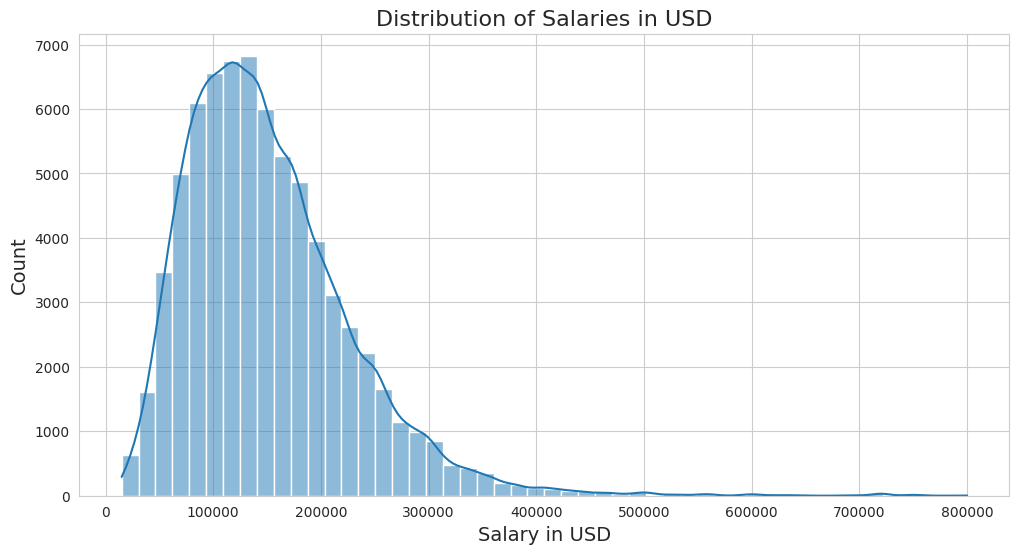

In [5]:
plt.figure(figsize=(12, 6))
sns.histplot(df['salary_in_usd'], bins=50, kde=True)
plt.title('Distribution of Salaries in USD', fontsize=16)
plt.xlabel('Salary in USD', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

### Salary by Experience Level

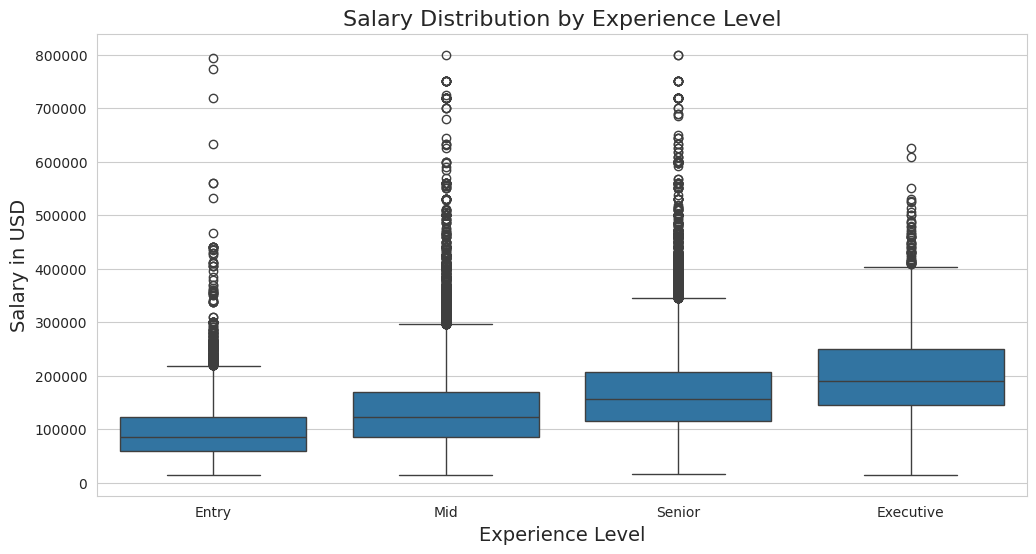

In [6]:
plt.figure(figsize=(12, 6))
order = ['EN', 'MI', 'SE', 'EX']
sns.boxplot(x='experience_level', y='salary_in_usd', data=df, order=order)
plt.title('Salary Distribution by Experience Level', fontsize=16)
plt.xlabel('Experience Level', fontsize=14)
plt.ylabel('Salary in USD', fontsize=14)
plt.xticks([0, 1, 2, 3], ['Entry', 'Mid', 'Senior', 'Executive'])
plt.show()

### Salary by Job Family

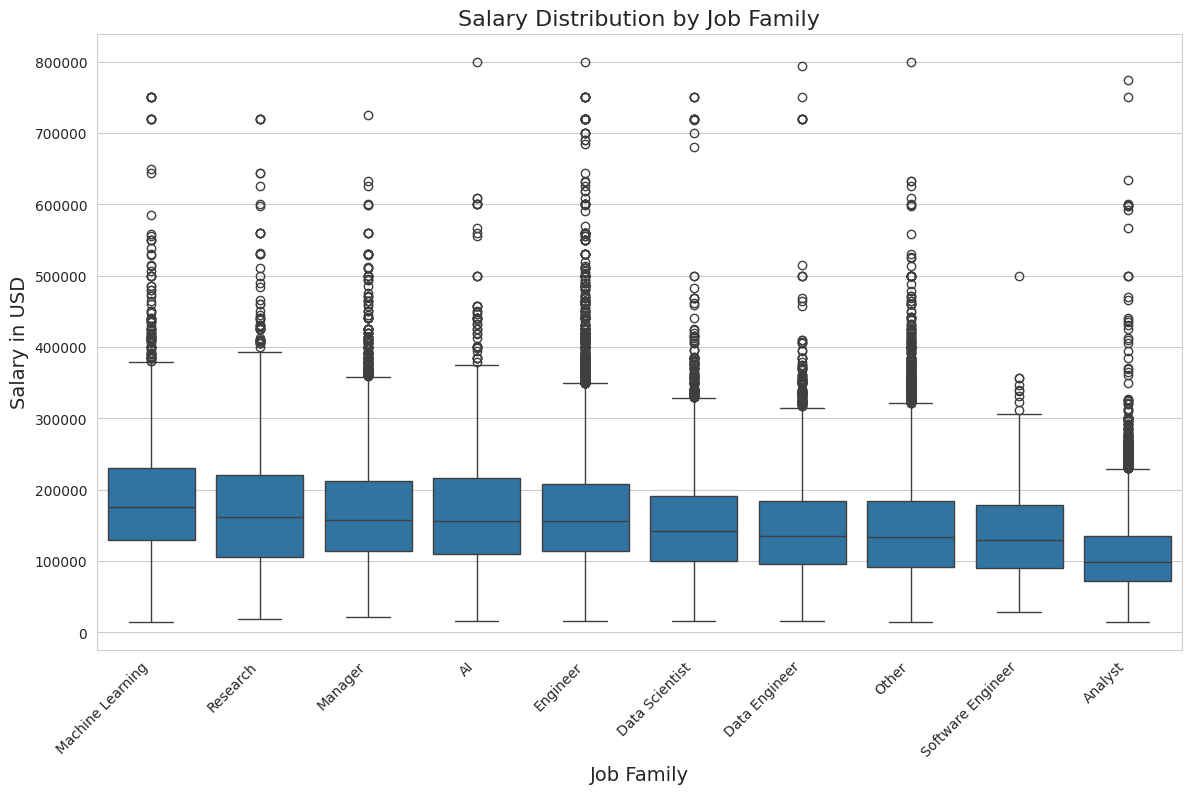

In [7]:
plt.figure(figsize=(14, 8))
order = df.groupby('job_family')['salary_in_usd'].median().sort_values(ascending=False).index
sns.boxplot(x='job_family', y='salary_in_usd', data=df, order=order)
plt.title('Salary Distribution by Job Family', fontsize=16)
plt.xlabel('Job Family', fontsize=14)
plt.ylabel('Salary in USD', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

### Salary Trend by Year

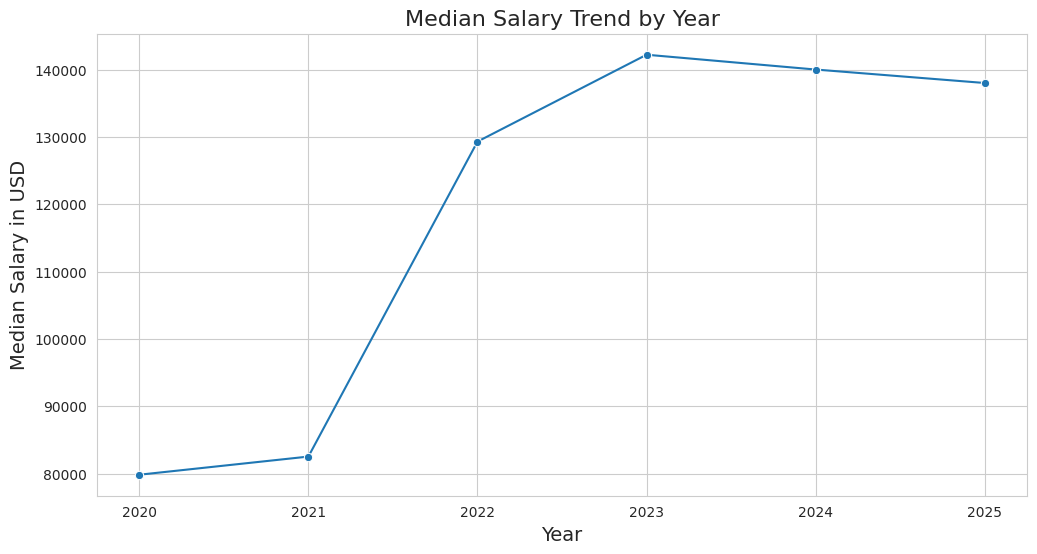

In [8]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='work_year', y='salary_in_usd', data=df, estimator='median', errorbar=None, marker='o')
plt.title('Median Salary Trend by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Median Salary in USD', fontsize=14)
plt.xticks(df['work_year'].unique())
plt.show()

## 5. Machine Learning Model to Predict Salary

In [9]:
# Define features and target
features = ['experience_level', 'employment_type', 'job_family', 'remote_ratio', 'company_size', 'is_us']
target = 'salary_in_usd'

X = df[features]
y = df[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessing steps
categorical_features = ['experience_level', 'employment_type', 'job_family', 'company_size']
numerical_features = ['remote_ratio', 'is_us']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor(random_state=42))])

### Hyperparameter Tuning with GridSearchCV

In [10]:
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [10, 20],
    'regressor__min_samples_leaf': [2, 4]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters found:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END regressor__max_depth=10, regressor__min_samples_leaf=2, regressor__n_estimators=100; total time=  14.9s
[CV] END regressor__max_depth=10, regressor__min_samples_leaf=2, regressor__n_estimators=100; total time=  15.0s
[CV] END regressor__max_depth=10, regressor__min_samples_leaf=2, regressor__n_estimators=100; total time=  15.2s
[CV] END regressor__max_depth=10, regressor__min_samples_leaf=2, regressor__n_estimators=100; total time=  16.9s
[CV] END regressor__max_depth=10, regressor__min_samples_leaf=2, regressor__n_estimators=100; total time=  14.6s
[CV] END regressor__max_depth=10, regressor__min_samples_leaf=2, regressor__n_estimators=200; total time=  29.0s
[CV] END regressor__max_depth=10, regressor__min_samples_leaf=2, regressor__n_estimators=200; total time=  30.6s
[CV] END regressor__max_depth=10, regressor__min_samples_leaf=2, regressor__n_estimators=200; total time=  29.5s
[CV] END regressor__max_depth=10, re

### Model Evaluation

Root Mean Squared Error (RMSE): $67,995.63
R-squared (R2) Score: 0.24


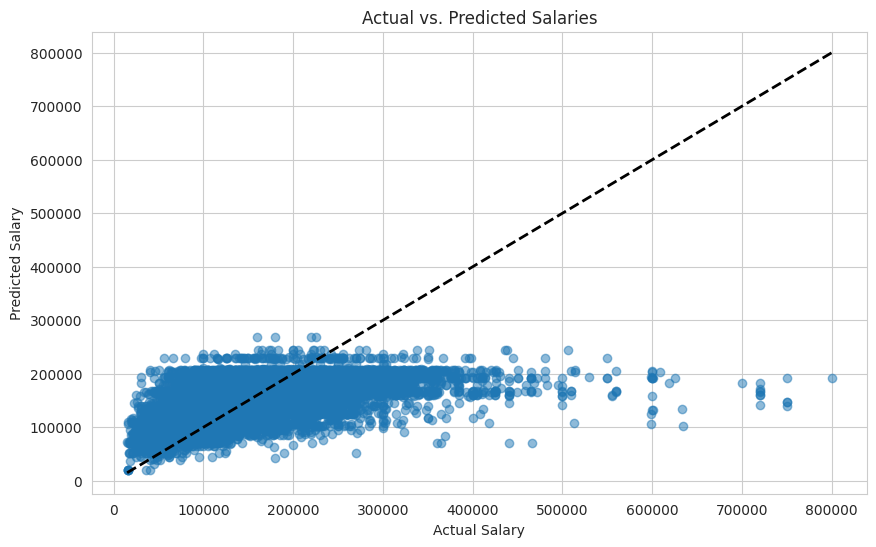

In [11]:
y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs. Predicted Salaries')
plt.show()

## 6. Conclusion

This analysis provides a comprehensive overview of data science salaries. Key findings include:
- Salaries have been steadily increasing from 2020 to 2025.
- Experience level is a major factor in determining salary, with Executive-level professionals earning significantly more.
- The United States is the highest-paying country for data science roles.
- The 'Machine Learning' and 'Data Scientist' job families command the highest salaries.

The machine learning model can predict salaries with a reasonable R-squared value, indicating that the selected features have predictive power. Further improvements could be made by including more features, trying different models like Gradient Boosting, and gathering more data.